In [5]:
data_path = '../../data/'

In [2]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from jupyterthemes import jtplot

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

# Data wrangling

In [6]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')

prof = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

In [7]:
tags_merged = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')

In [8]:
tags_merged['tags_tag_name'] += ' '

In [9]:
que_tags = tags_merged[['questions_id', 'tags_tag_name']].groupby(by = 'questions_id', as_index = False).sum()

In [10]:
que_all = que.merge(que_tags, on = "questions_id")

In [11]:
que_all

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,lecture college professor
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,military army
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,overseas working-abroad
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,networking business
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,college scholarships highschoolsenior firstgen...
5,7c336403258f4da3a2e0955742c76462,d1e4587c0e784c62bc27eb8d16a07f38,2017-03-01 04:27:08 UTC+0000,How many years of coege do you need to be an e...,To be an engineer #united-states,united-states
6,be3c5edfdb07423e955e9b2d7f186bce,71b4554d4a824253aa28287372c55797,2017-09-01 04:59:38 UTC+0000,I want to become a doctor because of my great ...,I am a musician and want to pursue that in col...,medicine music
7,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,college building soccer
8,d4999cdc470049a1a3382c4b5f14a7aa,654e1d6fd5b947249c0e70658d01b2ac,2017-08-31 19:20:47 UTC+0000,What are the college classes like for and grap...,I'm asking because I was thinking about choosi...,graphic-design graphics
9,e214acfbe6644d65b889a3268828db9d,16908136951a48ed942738822cedd5c2,2012-09-09 05:33:25 UTC+0000,what does it take to be an anesthesiologist?,I am a sophomore who is interested in learning...,experience healthcare doctor anesthesiologist


In [12]:
ans_que = ans.merge(que_all, left_on = "answers_question_id", right_on = "questions_id")

In [13]:
ans_que

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,lecture college professor
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,military army
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,military army
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,overseas working-abroad
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,networking business
5,5f62fadae80748c7907e3b0551bf4203,b03c3872daeb4a5cb1d8cd510942f0c4,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-12 16:01:44 UTC+0000,Networking is a key component to progressing y...,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,networking business
6,1d804b3b9e764cdd90195fb138d1a5aa,f6c89fde797d45938bce3531f55c9b6b,5af8880460c141dbb02971a1a8369529,2017-09-29 18:50:11 UTC+0000,https://www.unigo.com/\n\nCheck out this websi...,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,college scholarships highschoolsenior firstgen...
7,08d3cf6fa20543ddbdc42f70a7bcae9e,5bc2db4d58584f95bdba30ed2c21d573,5af8880460c141dbb02971a1a8369529,2018-06-08 02:39:02 UTC+0000,"<p>Hi Jocelyn ,</p><p><br></p><p>May I recomme...",5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,college scholarships highschoolsenior firstgen...
8,9d33d099a03c44328fbf166aad585f63,8136c8653d3a4895b49cac90b88120d2,7c336403258f4da3a2e0955742c76462,2017-03-01 16:52:43 UTC+0000,<p>For the typical schedule it takes four year...,7c336403258f4da3a2e0955742c76462,d1e4587c0e784c62bc27eb8d16a07f38,2017-03-01 04:27:08 UTC+0000,How many years of coege do you need to be an e...,To be an engineer #united-states,united-states
9,228e5feefb4e42188b7c48a5c7eb3aa8,35c8d979b56647839c8df0f0383648cd,be3c5edfdb07423e955e9b2d7f186bce,2017-10-13 18:08:20 UTC+0000,Of course! I know someone who doubled in class...,be3c5edfdb07423e955e9b2d7f186bce,71b4554d4a824253aa28287372c55797,2017-09-01 04:59

# Text pre-processing

In [14]:
stopwords = stopwords.words('english')

In [15]:
ps = PorterStemmer()
stemmed = dict()

In [16]:
def process_text(text: str):
    ret = []
    for word in word_tokenize(str(text).lower()):
        if word.isalpha() and word not in stopwords:
            if word not in stemmed:
                stemmed[word] = ps.stem(word)
            ret.append(stemmed[word])
    return ret

In [17]:
features = ['answers_body', 'questions_title', 'questions_body', 'tags_tag_name']

In [18]:
for feature in tqdm(features):
    ans_que[feature] = ans_que[feature].apply(process_text)

In [19]:
prof['professionals_industry'] = prof['professionals_industry'].apply(process_text)
prof['professionals_industry'] = prof['professionals_industry'].apply(lambda x: ' '.join((x + ['', ''])[:3]))

# Final preparation

In [20]:
df = ans_que.merge(prof, left_on = 'answers_author_id', right_on = 'professionals_id')

In [21]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...","[lectur, colleg, professor]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...","[colleg, build, soccer]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...","[engin, neurosci, gradschool]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3fc23809cda472780fc565334f35000,36ff3b3666df400f956f8335cf53e09e,acc611cfb5c44daa8a3d7d65dfffa5ff,2018-08-14 10:37:01 UTC+0000,"[p, import, thing, get, know, well, enough, de...",acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,"[prepar, job, search, go, senior, year, colleg]","[sociolog, polit, scienc, intern, studi, major...",[job],36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,7410001e9a2f46df982cba38ba60486a,36ff3b3666df400f956f8335cf53e09e,b44409c0c83a43578f4f2d0a0e4d8ead,2016-12-08 02:26:05 UTC+0000,"[p, hi, alexandra, p, site, profession, organ,...",b44409c0c83a43578f4f2d0a0e4d8ead,2fe767de78fa4dfd83f0021cf7712064,2016-12-07 20:43:41 UTC+0000,"[major, recommend, order, ethnomusicologist]","[current, enrol, world, music, class, univers,...","[music, ethnomusicolog, musicolog]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,8961104db49b42e6882661724543b565,36ff3b3666df400f956f8335cf53e09e,27653986401c4a8388d03cfa28acf5b4,2016-10-20 21:47:01 UTC+0000,"[p, hi, christoph, p, ask, good, question, luc...",27653986401c4a8388d03cfa28acf5b4,b5bd31ccef2d4a4fa638dd931a0e6cc9,2016-10-20 19:28:36 UTC+0000,"[much, opportun, stem, major, entertain, indus...","[question, regard, potenti, find, employ, indu...","[colleg, stem, entertain, film, vfx]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,d29c121eb71b43a3a338008353559bdd,36ff3b3666df400f956f8335cf53e09e,7017565a7f0141dbb47a3445ed128e34,2018-10-05 13:58:37 UTC+0000,"[p, use, process, present, increas, chanc, lan...",7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,"[find, job, career, field, colleg]","[colleg, job]","[colleg, job]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",men

In [22]:
considerable = set(df.professionals_industry.value_counts().where(lambda x: x>5).dropna().index)

In [23]:
len(considerable)

322

In [25]:
filtered = df[df.professionals_industry.isin(considerable)]

In [26]:
filtered

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...","[lectur, colleg, professor]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...","[colleg, build, soccer]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...","[engin, neurosci, gradschool]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3fc23809cda472780fc565334f35000,36ff3b3666df400f956f8335cf53e09e,acc611cfb5c44daa8a3d7d65dfffa5ff,2018-08-14 10:37:01 UTC+0000,"[p, import, thing, get, know, well, enough, de...",acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,"[prepar, job, search, go, senior, year, colleg]","[sociolog, polit, scienc, intern, studi, major...",[job],36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,7410001e9a2f46df982cba38ba60486a,36ff3b3666df400f956f8335cf53e09e,b44409c0c83a43578f4f2d0a0e4d8ead,2016-12-08 02:26:05 UTC+0000,"[p, hi, alexandra, p, site, profession, organ,...",b44409c0c83a43578f4f2d0a0e4d8ead,2fe767de78fa4dfd83f0021cf7712064,2016-12-07 20:43:41 UTC+0000,"[major, recommend, order, ethnomusicologist]","[current, enrol, world, music, class, univers,...","[music, ethnomusicolog, musicolog]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,8961104db49b42e6882661724543b565,36ff3b3666df400f956f8335cf53e09e,27653986401c4a8388d03cfa28acf5b4,2016-10-20 21:47:01 UTC+0000,"[p, hi, christoph, p, ask, good, question, luc...",27653986401c4a8388d03cfa28acf5b4,b5bd31ccef2d4a4fa638dd931a0e6cc9,2016-10-20 19:28:36 UTC+0000,"[much, opportun, stem, major, entertain, indus...","[question, regard, potenti, find, employ, indu...","[colleg, stem, entertain, film, vfx]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,d29c121eb71b43a3a338008353559bdd,36ff3b3666df400f956f8335cf53e09e,7017565a7f0141dbb47a3445ed128e34,2018-10-05 13:58:37 UTC+0000,"[p, use, process, present, increas, chanc, lan...",7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,"[find, job, career, field, colleg]","[colleg, job]","[colleg, job]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",men

In [27]:
prepared = []
for feature in tqdm(features):
    prepared += [TaggedDocument(row[feature], [row.professionals_industry]) for i, row in filtered.iterrows()]

In [28]:
prepared = random.sample(prepared, len(prepared))

In [29]:
len(prepared)

188988

# Doc2Vec

In [30]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [31]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.001s...
[t-SNE] Computed neighbors for 322 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.824821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.099998
[t-SNE] KL divergence after 1000 iterations: 0.902444


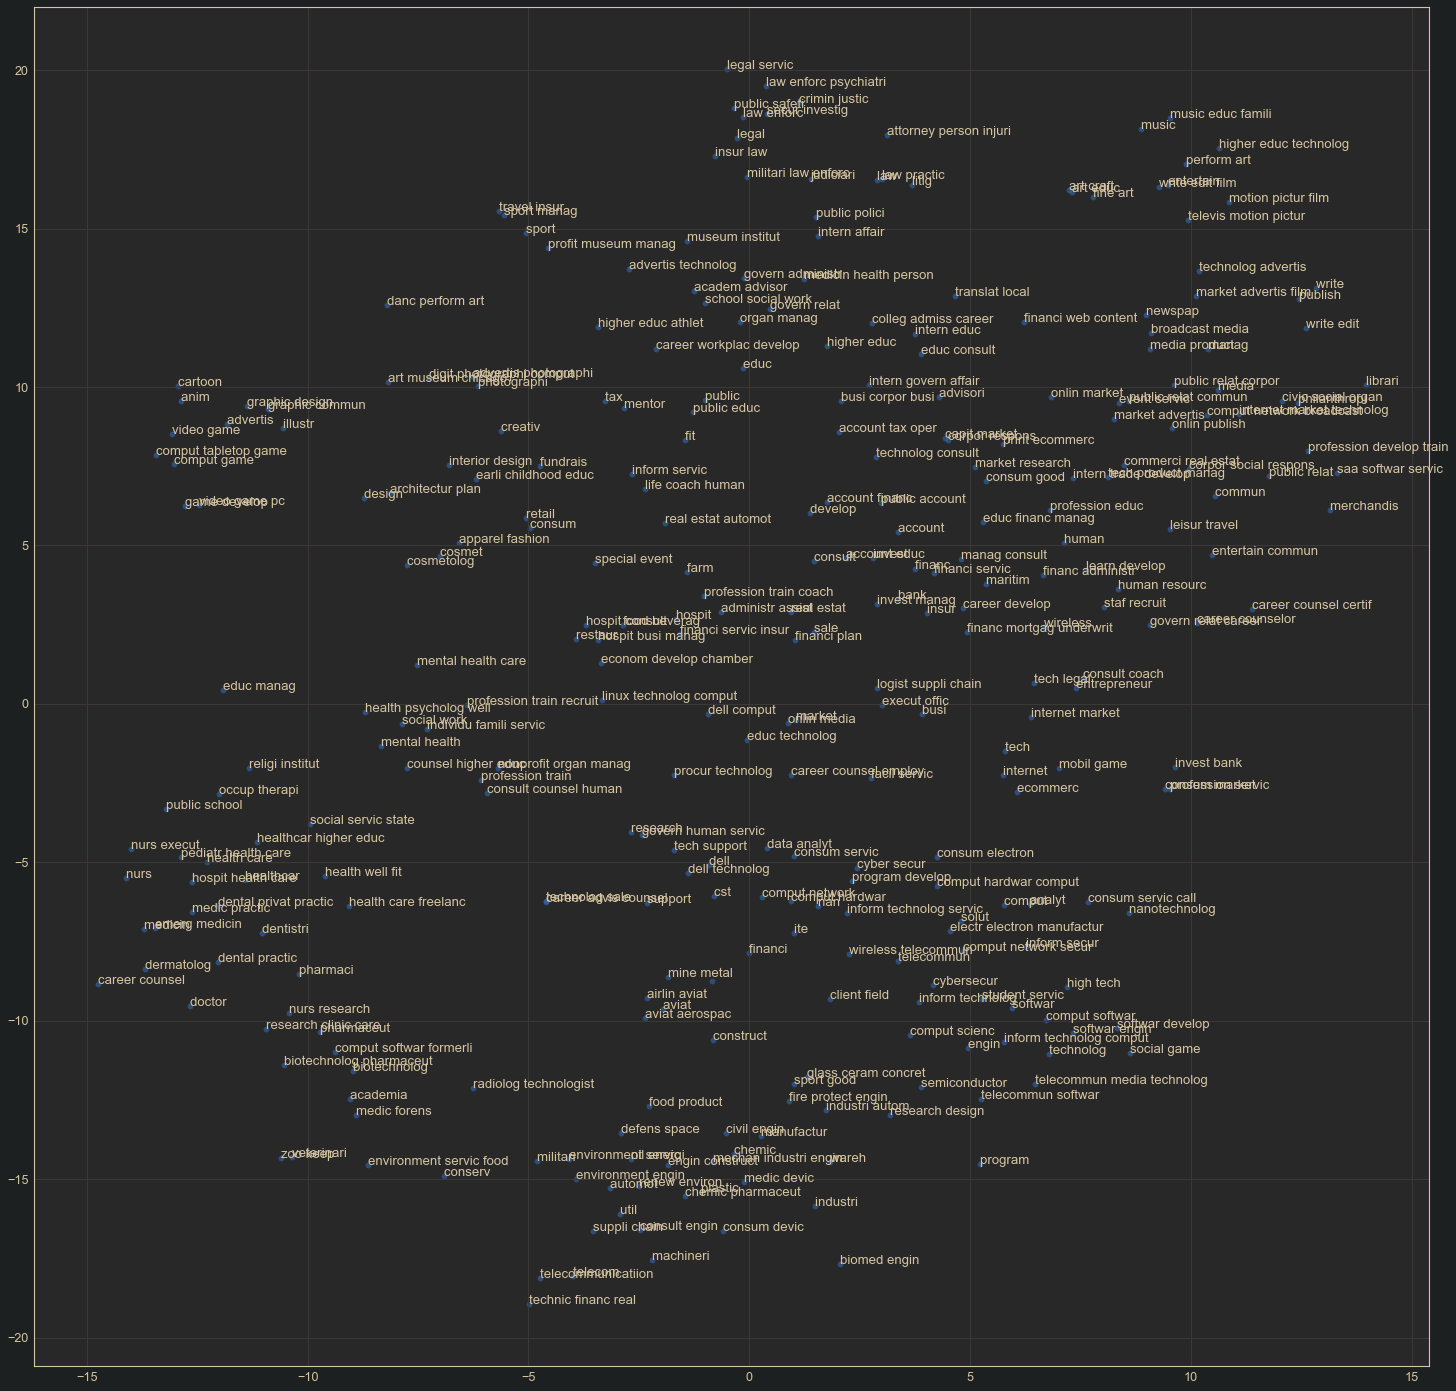

In [ ]:
fig, ax = plt.subplots(figsize = (25, 25))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

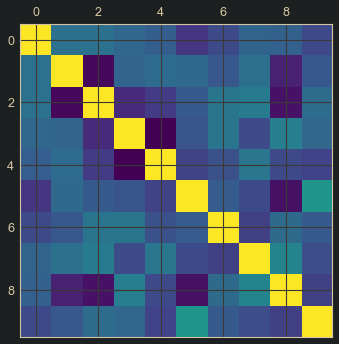

In [ ]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [ ]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.089527,0.088665,0.026613,-0.019202,-0.225146,-0.127131,0.013055,-0.002523,-0.131272
1,0.089527,1.000000,-0.421086,0.021918,0.051165,0.041488,-0.062421,0.084355,-0.321496,-0.060468
2,0.088665,-0.421086,1.000000,-0.278410,-0.201800,-0.043691,0.108725,0.138874,-0.386096,0.058710
3,0.026613,0.021918,-0.278410,1.000000,-0.455057,-0.079645,0.110861,-0.115912,0.166472,0.024962
4,-0.019202,0.051165,-0.201800,-0.455057,1.000000,-0.157517,-0.091568,0.116178,-0.134182,-0.165148
5,-0.225146,0.041488,-0.043691,-0.079645,-0.157517,1.000000,-0.029271,-0.128020,-0.389471,0.304567
6,-0.127131,-0.062421,0.108725,0.110861,-0.091568,-0.029271,1.000000,-0.179494,0.050180,-0.043888
7,0.013055,0.084355,0.138874,-0.115912,0.116178,-0.128020,-0.179494,1.000000,0.195748,-0.110428
8,-0.002523,-0.321496,-0.386096,0.166472,-0.134182,-0.389471,0.050180,0.195748,1.000000,-0.178110
9,-0.131272,-0.060468,0.058710,0.024962,-0.165148,0.304567,-0.043888,-0.110428,-0.178110,1.000000


# Save

In [ ]:
d2v.save('industries.d2v')

In [ ]:
docvecs = {d2v.docvecs.index2entity[i]: d2v.docvecs.vectors_docs[i] for i in range(len(d2v.docvecs.index2entity))}

In [ ]:
with open('industries_embs.pickle', 'wb') as file:
    pickle.dump(docvecs, file)